<a href="https://colab.research.google.com/github/jjjjj1983/Preparing-Sales-Data-for-further-usage/blob/main/Predicting_Revenue_Based_on_Time_Spent_Online.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. We predict the average customer purchase income (`purchase_value`, in monetary units) based on the time spent on the site (`time_on_site`, in minutes).
2. Build a scatter plot for the input data. Assess the type of dependence, draw the regression line on the graph.
3. Split the dataset into training and test data.
4. Train a linear model on the training data and make predictions for the test data.
5. Calculate MAE, MSE, RMSE, and $R^2$ to evaluate the prediction quality on the test dataset.
6. Calculate MAE, MSE, RMSE, and $R^2$ to evaluate the prediction quality using cross-validation.
7. Draw conclusions from the obtained metric values. Consider which metric is the most indicative in this task.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    "time_on_site": [
        29.1, 24.7, 17.6, 2.8, 45.4, 31.7, 48.2, 40.5, 15.7, 30.6, 25.2, 24.3,
        42.7, 25.6, 45.0, 24.2, 24.2, 47.4, 34.5, 47.1, 30.4, 26.6, 9.5, 3.2,
        30.4, 32.4, 19.8, 41.2, 40.1, 29.0, 42.0, 29.4, 10.8, 15.0, 20.5, 15.1,
        17.8, 37.4, 24.9, 43.3, 7.4, 15.4, 23.3, 41.0, 35.6, 41.4, 18.9, 40.2,
        33.0, 3.0
    ],
    "purchase_value": [
        396.1, 318.7, 112.3, 163.4, 624.1, 378.0, 689.4, 551.3, 234.3, 413.3,
        334.9, 351.1, 512.8, 265.4, 636.4, 356.7, 251.6, 620.6, 398.5, 551.6,

        493.9, 330.9, 174.2, 7.0, 368.3, 335.4, 308.5, 567.0, 535.9, 311.0,
        584.1, 428.4, 107.3, 221.1, 264.5, 242.2, 316.1, 498.3, 323.8, 495.6,
        115.9, 132.3, 238.3, 553.2, 307.4, 494.6, 234.6, 497.5, 424.1, 164.1
    ]
}

df = pd.DataFrame(data)

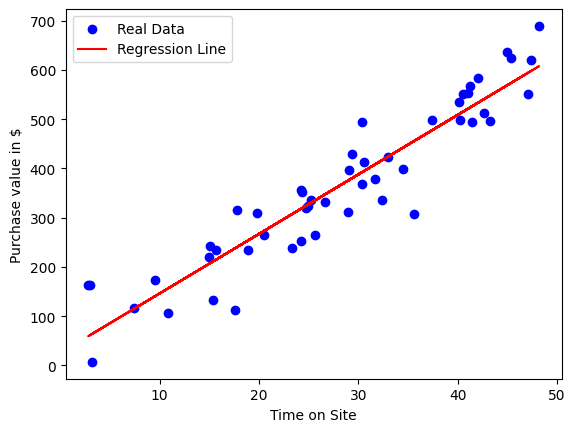

In [2]:
from sklearn.linear_model import LinearRegression

# Getting data for model
X = df[["time_on_site"]]
y = df["purchase_value"]

# Model training
model = LinearRegression()
model.fit(X, y)

# Prediction
y_pred = model.predict(X)

# Visualization
plt.scatter(X, y, color="blue", label="Real Data")
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.xlabel("Time on Site")
plt.ylabel("Purchase value in $")
plt.legend()
plt.show()

In [3]:
# get w_0
print("w_0:", model.intercept_)

# get w_1
print("w_1:", model.coef_)


w_0: 25.33830657160871
w_1: [12.08193996]


In [4]:
from sklearn.model_selection import train_test_split

X = df[["time_on_site"]]
y = df["purchase_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=201)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

print("Train data:\n", y_train.index)
print("Test data:\n", y_test.index)


Train data:
 Index([45, 43, 39, 40,  5, 42,  3, 21, 47,  1, 32, 24,  2, 13, 38,  8, 48, 15,
       26, 44, 16, 35,  9, 23, 31, 36, 33, 49, 41,  0],
      dtype='int64')
Test data:
 Index([25, 14, 7, 18, 46, 34, 29, 12, 11, 22, 37, 20, 10, 4, 17, 28, 6, 30, 19,
       27],
      dtype='int64')


In [5]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)


MAE: 54.80548817571931


In [6]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 4446.680004961143


In [7]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_test, y_pred)
print("RMSE:", rmse)


RMSE: 66.68343126265431


In [8]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2:", r2)


R2: 0.7935069930770249


In [9]:
from sklearn.model_selection import cross_val_score

model_cr = LinearRegression()
scores = cross_val_score(model_cr, X, y, cv=6)  # 5-fold cross-validation

print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())


Cross-validation scores: [0.87563686 0.88670164 0.87278123 0.91507133 0.88482632 0.70164634]
Mean cross-validation score: 0.8561106198376752


The R² value and Cross validation value are close to each other, therefore one of them could be used for the model. The MSE and MAE do not really give a certain significance for model evaluation